# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from IPython.display import display, HTML
from IPython.display import display, Image

# Carregar os dados do arquivo CSV
dados = pd.read_csv('dados_ativos.csv', header=[0, 1], index_col=0)

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

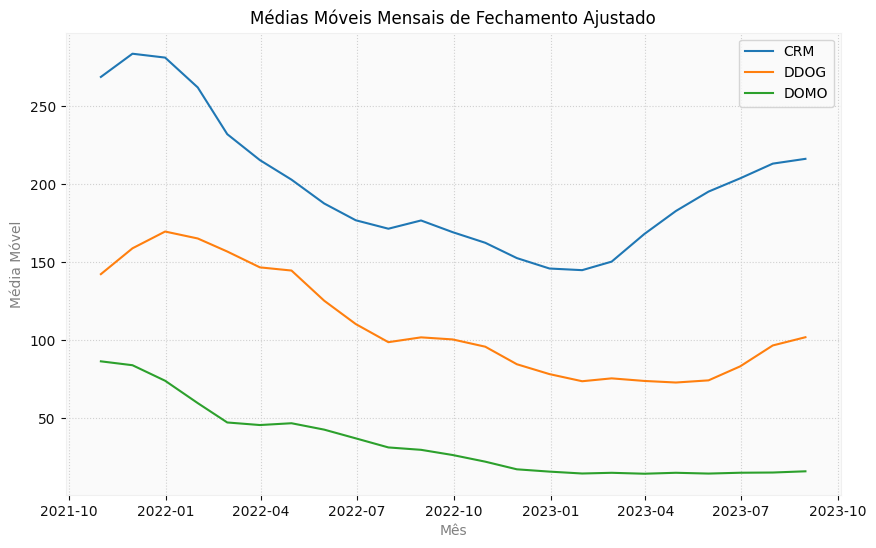

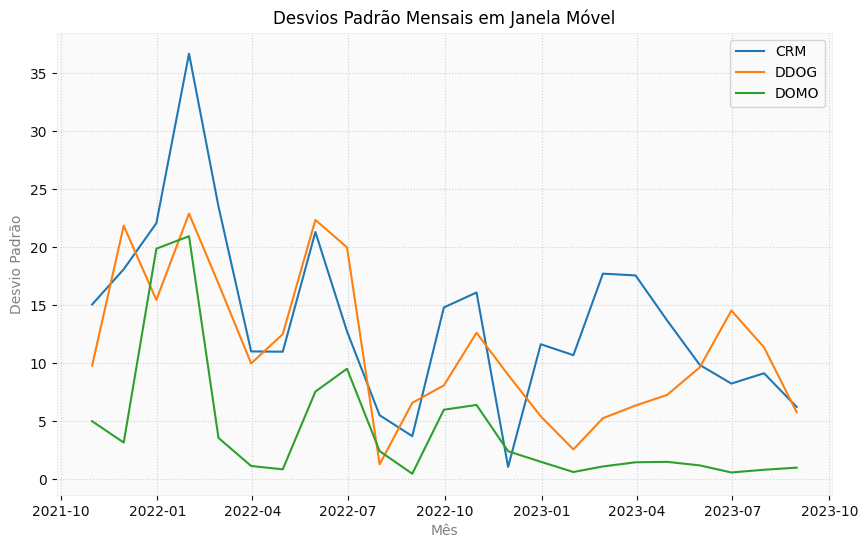

---------------------------------------------------------------------------


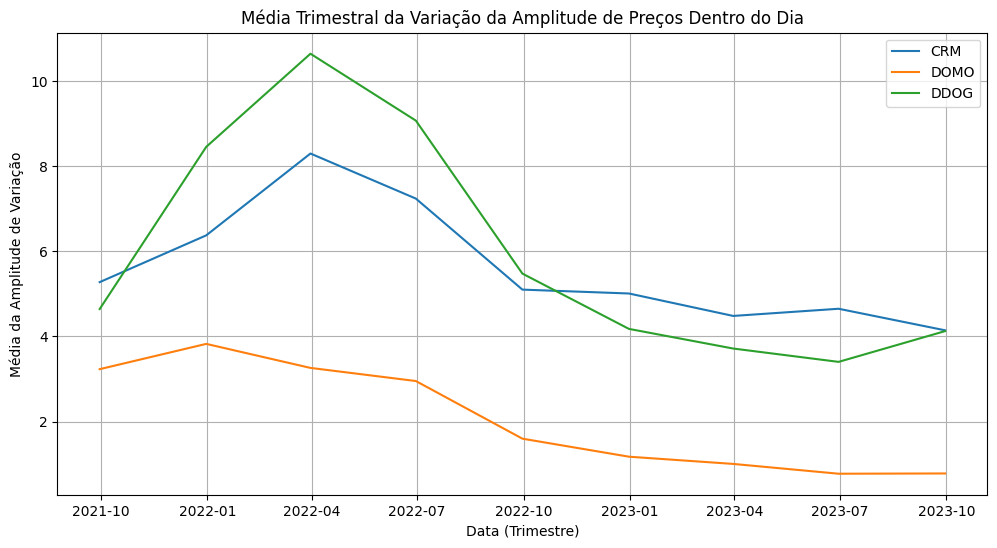

In [19]:
# Converter o índice para formato de data
dados.index = pd.to_datetime(dados.index)

# Agrupar os dados em meses e calcular média e desvio padrão
dados_mensais = dados.resample('M').mean()  # 'M' para agrupamento mensal
media_movel = dados_mensais['Close'].apply(pd.to_numeric).rolling(window=3).mean()  # Janela de 3 meses
desvio_padrao = dados_mensais['Close'].apply(pd.to_numeric).rolling(window=3).std()  # Janela de 3 meses

# Montar gráfico de linhas para as médias móveis mensais
plt.figure(figsize=(10, 6))
for col in media_movel.columns:
    plt.plot(media_movel.index, media_movel[col], label=col)

plt.title('Médias Móveis Mensais de Fechamento Ajustado')
plt.xlabel('Mês')
plt.ylabel('Média Móvel')
plt.legend()
plt.show()

# Montar gráfico de linhas para os desvios padrão mensais
plt.figure(figsize=(10, 6))
for col in desvio_padrao.columns:
    plt.plot(desvio_padrao.index, desvio_padrao[col], label=col)

plt.title('Desvios Padrão Mensais em Janela Móvel')
plt.xlabel('Mês')
plt.ylabel('Desvio Padrão')
plt.legend()
plt.show()

print("-" * 75)

texto_formatado = "<center><b>GRÁFICO DA ATIVIDADE ANTERIOR</b></center>"
display(HTML(texto_formatado))

# Carregar e exibir a imagem
imagem = "grafico.png"
display(Image(filename=imagem))


5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.
* O Gráfico de Médias Móveis Mensais de Fechamento Ajustado tem pouca semelhança com relação ao gráfico da atividade anterior, já o gráfico de Desvio Padrão Mensais em Janela Móvel já demonstra uma semelhança um pouco maior principalmente no período citado na atividade anterior, que foi o período de 2021-10 a 2022-04, onde a partir desta última data os ativos tem uma queda abrupta e depois uma estabilidade temporária.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

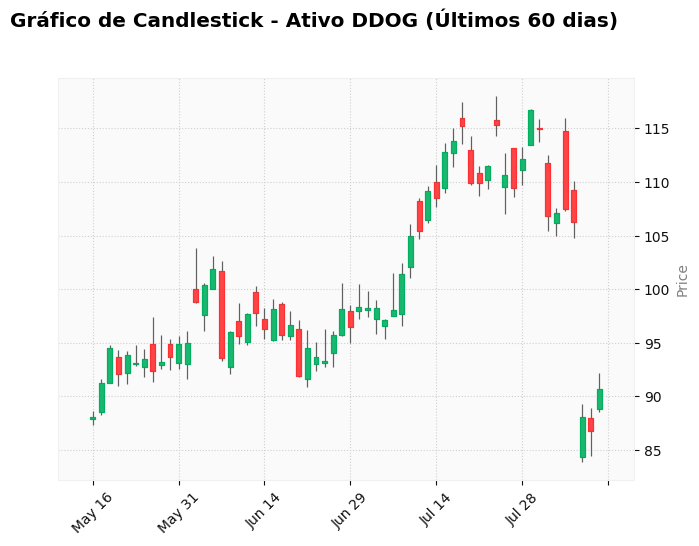

In [20]:
# Selecionar o ativo DDOG
ativo_ddog = dados['Close']['DDOG']

# Selecionar os últimos 60 dias
ultimo_60_dias = ativo_ddog.index[-60:]

# Criar um DataFrame com os dados dos últimos 60 dias
dados_60_dias = ativo_ddog.loc[ultimo_60_dias]

# Criar um DataFrame com colunas 'Open', 'High', 'Low', 'Close' e 'Volume'
dados_candlestick = pd.DataFrame({
    'Open': dados['Open']['DDOG'].loc[ultimo_60_dias],
    'High': dados['High']['DDOG'].loc[ultimo_60_dias],
    'Low': dados['Low']['DDOG'].loc[ultimo_60_dias],
    'Close': dados['Close']['DDOG'].loc[ultimo_60_dias],
    'Volume': dados['Volume']['DDOG'].loc[ultimo_60_dias]
})

# Definir estilo do gráfico
style = mpf.make_mpf_style(base_mpf_style='yahoo', gridstyle=':', rc={'axes.labelcolor': 'gray'})

# Plotar o gráfico de candlestick
mpf.plot(dados_candlestick, type='candle', title='Gráfico de Candlestick - Ativo DDOG (Últimos 60 dias)', style=style)
